`About Dataset`
Context
We collect recent tweets about Pfizer & BioNTech vaccine.

The data is collected using tweepy Python package to access Twitter API.

Inspiration
Study the subjects of recent tweets about the vaccine made in collaboration by Pfizer and BioNTech, perform various NLP tasks on this data source.

In [45]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [47]:
tw=pd.read_csv("/content/vaccination_tweets.csv")

In [48]:
tw.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [49]:
tw.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False
11019,1460208097956225028,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-15 11:28:34,"The number of Covid-19 cases today, 15 Novembe...",NaN,Twitter Web App,2,6,False


In [50]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [51]:
tw.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [52]:
tw.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [53]:
te=tw.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
te.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [54]:
print(te["text"].iloc[0],"\n")
print(te["text"].iloc[1],"\n")
print(te["text"].iloc[2],"\n")
print(te["text"].iloc[3],"\n")
print(te["text"].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [55]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [56]:
def data_processing(text):
  text=text.lower()
  text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)



1. تحويل النص إلى حروف صغيرة.
2. إزالة روابط الإنترنت (النمط الذي يبدأ بـ 'https' أو 'www' ويتبعه أي حرفو حتى يصل إلى 'https' آخر).
3. إزالة الرموز '@' و '#'.
4. إزالة الأحرف غير الأبجدية والأرقام (الاحتفاظ فقط بالكلمات والمسافات).
5. تقسيم النص إلى كلمات.
6. فلترة الكلمات الدون معنى (Stop words) من النص.
7. إرجاع النص المعالج كنص واحد.

إذا كان لديك قائمة `stop_words` محددة في جزء آخر من الكود، فإن هذه الوظيفة ستقوم بالمعالجة بشكل جيد لتنظيف النصوص.

In [57]:
te.text = te['text'].apply(data_processing)

In [58]:
te

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...
...,...
11015,number covid19 cases today 17 november 2021 re...
11016,first dose pfizerbiontech
11017,number covid19 cases today 16 november 2021 re...
11018,pfizerbiontech developed new pill paxlovid inc...


In [59]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return text

In [60]:
te=te.apply(lambda x: stemming(x))

In [61]:
te.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [62]:
print(te["text"].iloc[0],"\n")
print(te["text"].iloc[1],"\n")
print(te["text"].iloc[2],"\n")
print(te["text"].iloc[3],"\n")
print(te["text"].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 year 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [63]:
def polarity (text):
  return TextBlob(text).sentiment.polarity

هذه الوظيفة تستخدم مكتبة TextBlob في Python لتحديد مدى الانفعال (الميل) في النصوص. تقوم الوظيفة باستخدام الدالة `sentiment.polarity` من TextBlob لحساب قيمة الميل (polarity) في النص.

هنا هو ما تفعله الوظيفة بالتفصيل:

1. `textBlob(text)`: يقوم بإنشاء كائن TextBlob من النص الممرر إليه الوظيفة.
2. `sentiment.polarity`: يستخدم الكائن TextBlob لاستخراج الميل (polarity) من النص. قيمة الميل تتراوح بين -1 و1، حيث تكون القيمة السالبة تشير إلى ميل سلبي، والقيمة الموجبة تشير إلى ميل إيجابي، وصفر يشير إلى نص محايد.

الدالة `polarity()` التي قمت بكتابتها تبدو مخصصة لاستخدام TextBlob لتحليل الميل في النصوص.

In [64]:
te["polarity"]=te["text"].apply(polarity)

In [65]:
te.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [66]:
def sentiment(label):
  if label < 0:
    return "Negative"
  elif label == 0:
    return "Neutral"
  elif label > 0:
    return "Positive"

In [67]:
te["sentiment"]=te["polarity"].apply(sentiment)

In [68]:
te.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

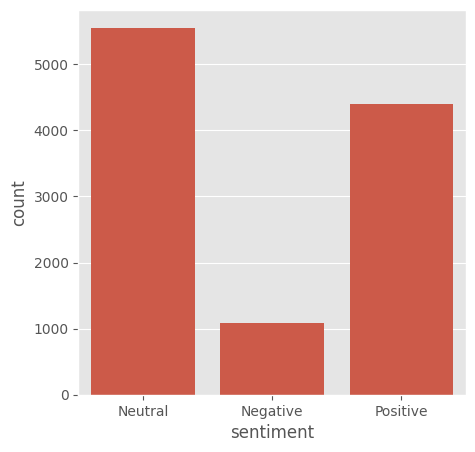

In [69]:
fit=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=te)

Text(0.5, 1.0, 'Distribution of sentiments')

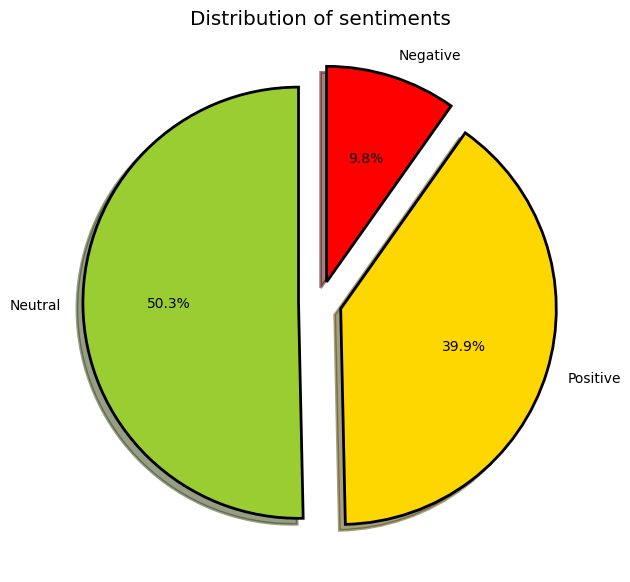

In [70]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = te['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [71]:
pos_tweets = te[te.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
8370,updated upgraded today perfect dadcase got enr...,1.0,Positive
3282,truly wonderful news covid19 pfizerbiontech,1.0,Positive
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
6299,best shot vaccinesavelives pfizerbiontech,1.0,Positive
6792,best news yet pfizercovidvaccine pfizerbiontech,1.0,Positive


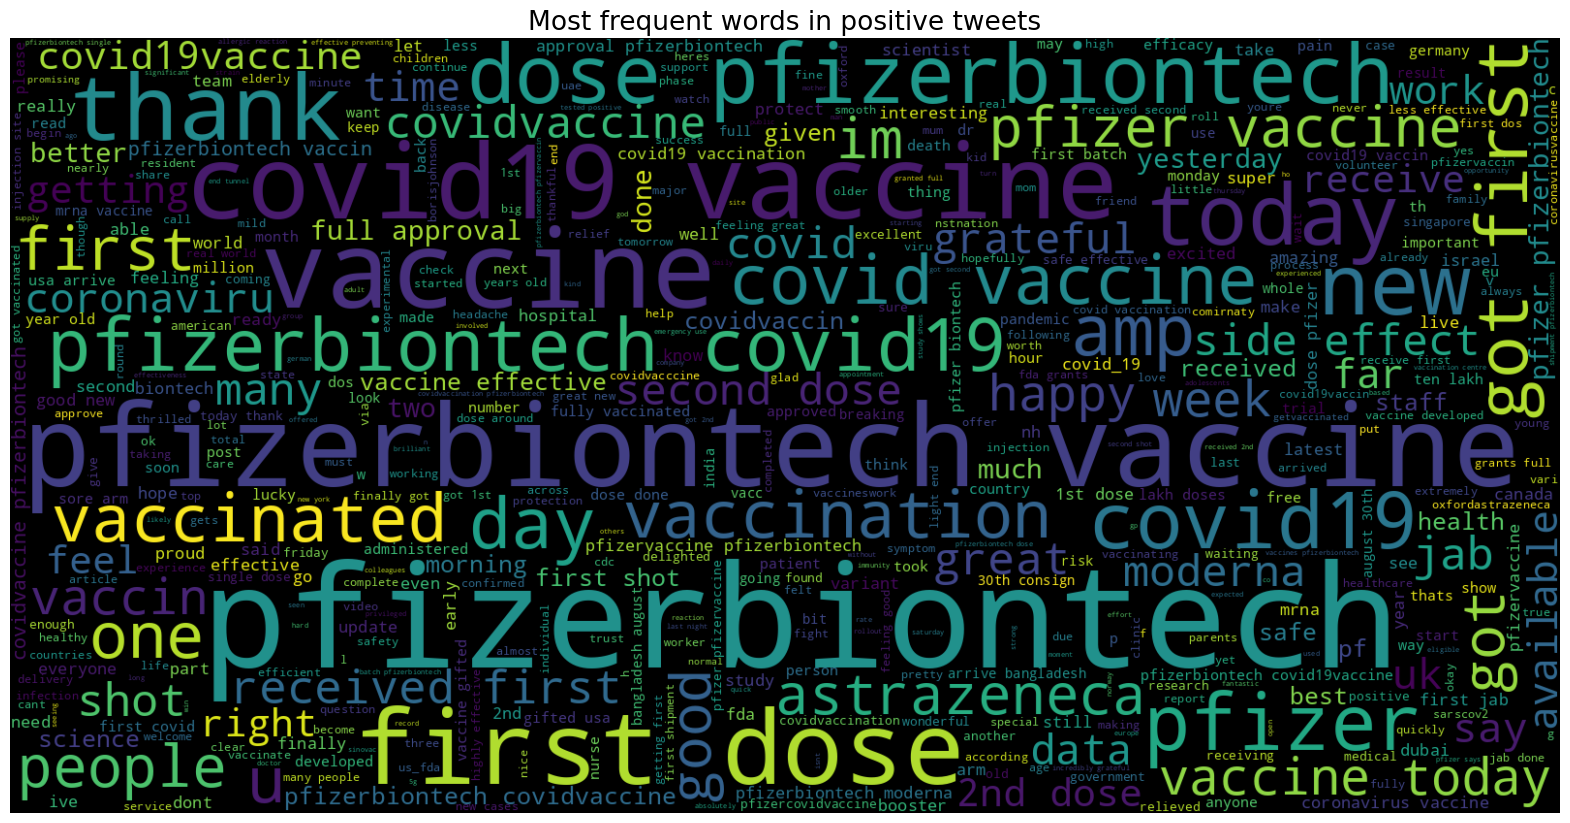

In [72]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [73]:
neg_tweets = te[te.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative
2907,2015 worried absence mrna vaccine challenge wa...,-0.006250,Negative


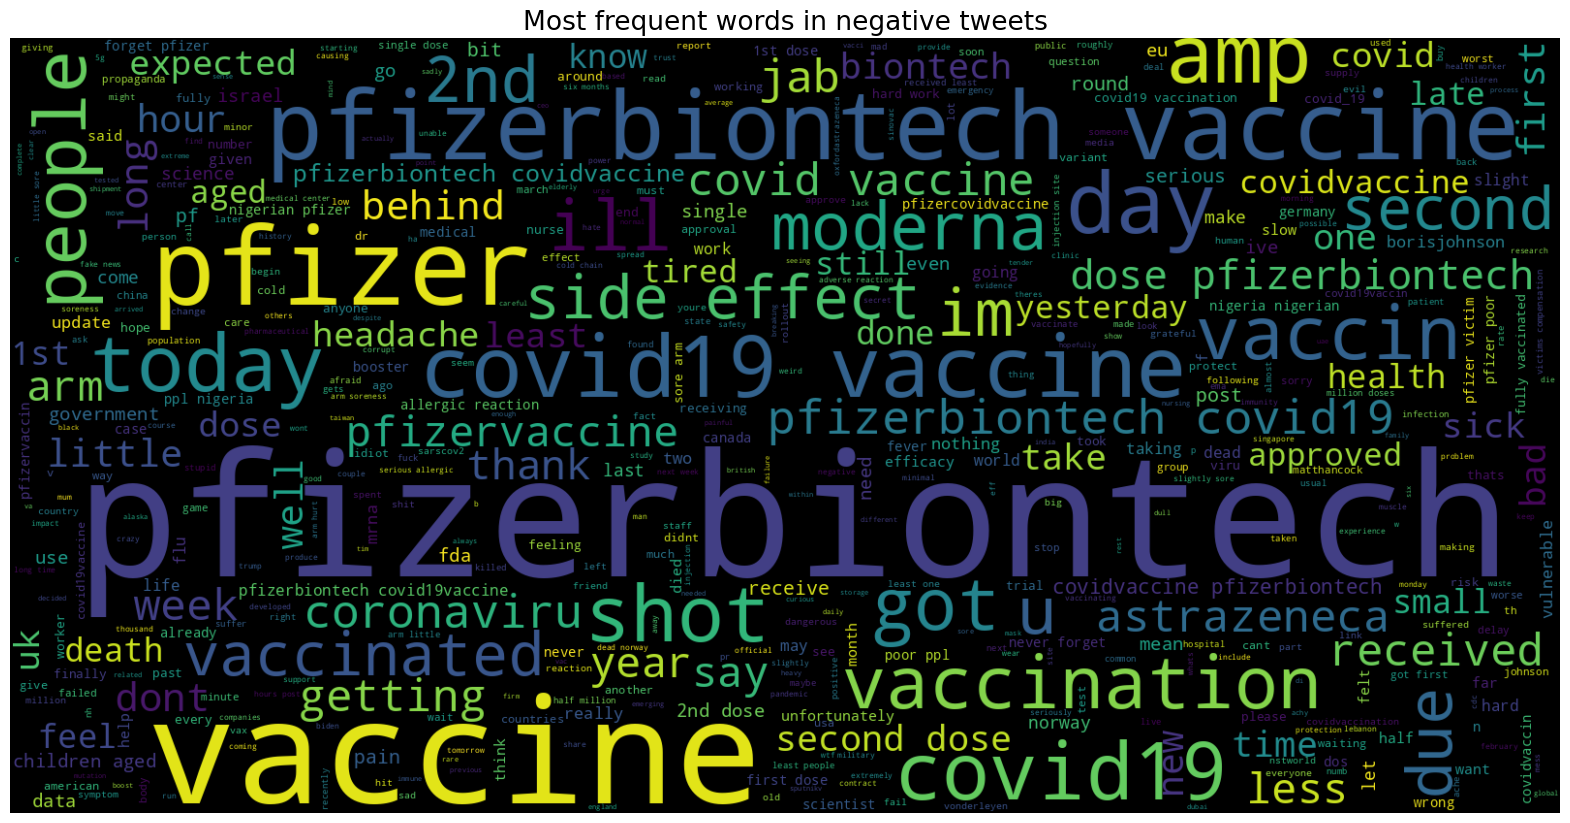

In [74]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [75]:
neutral_tweets = te[te.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7523,number covid19 cases today 31 mar 2021 remembe...,0.0,Neutral
7545,yesterday asked one canadian friend vaccine wo...,0.0,Neutral
7543,delbigtree jeffereyjaxen patrick_layton cathar...,0.0,Neutral
7539,additional measures discussions potential part...,0.0,Neutral


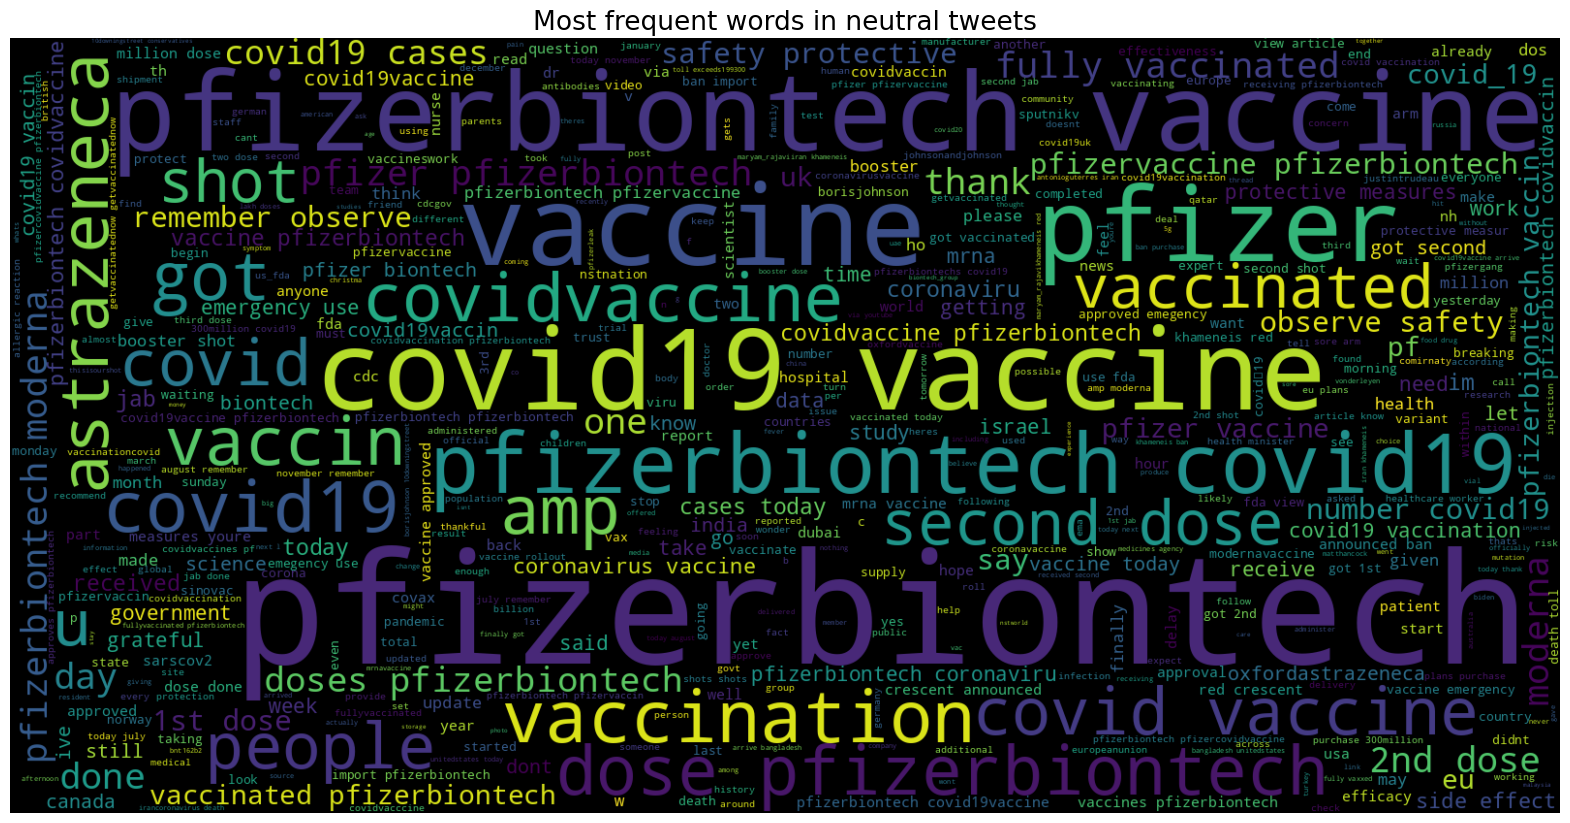

In [76]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [77]:
vect = CountVectorizer(ngram_range=(1,2)).fit(te['text'])

In [78]:
X = te['text']
Y = te['sentiment']
X = vect.transform(X)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8816, 79368)
Size of y_train: (8816,)
Size of x_test: (2204, 79368)
Size of y_test: (2204,)


In [81]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.85%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  62  128   24]
 [   2 1085    9]
 [  12  159  723]]


              precision    recall  f1-score   support

    Negative       0.82      0.29      0.43       214
     Neutral       0.79      0.99      0.88      1096
    Positive       0.96      0.81      0.88       894

    accuracy                           0.85      2204
   macro avg       0.85      0.70      0.73      2204
weighted avg       0.86      0.85      0.83      2204



In [83]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 87.84%


In [84]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  95   95   24]
 [   2 1084   10]
 [  16  121  757]]


              precision    recall  f1-score   support

    Negative       0.84      0.44      0.58       214
     Neutral       0.83      0.99      0.90      1096
    Positive       0.96      0.85      0.90       894

    accuracy                           0.88      2204
   macro avg       0.88      0.76      0.79      2204
weighted avg       0.88      0.88      0.87      2204

